In [5]:
print('hello')
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import helper_functions as hf
import random as random

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

hello


In [6]:
df_blockchain = pd.read_csv("./df_blockchain.csv", delimiter=";")
df_blockchain.head()

,Date,market-price,n-transactions-per-block,median-confirmation-time,hash-rate,difficulty,miners-revenue,trade-volume,blocks-size,avg-block-size,...,cost-per-transaction,n-unique-addresses,n-transactions,n-transactions-total,n-transactions-excluding-popular,output-volume,estimated-transaction-volume,estimated-transaction-volume-usd,total-bitcoins,market-cap
0,2011-09-13,6.88,45.908451,0.0,12.018816,1.777774e+06,52318.011503,0.0,592.190091,0.019009,...,7.666766,12622.0,6519.0,1497195.0,6519.0,358543.612114,58615.641320,403275.612279,7.257416e+06,5.022014e+07
1,2011-09-14,6.19,42.465753,0.0,13.263925,1.755425e+06,48306.468911,0.0,594.907367,0.018007,...,7.369408,12408.0,6200.0,1503780.0,6200.0,302619.024544,74521.484625,461287.989830,7.264662e+06,4.540930e+07
2,2011-09-15,5.92,41.500000,0.0,12.914875,1.755425e+06,60431.444952,0.0,597.554226,0.018240,...,7.333913,12988.0,6474.0,1509972.0,6474.0,299226.130646,79422.402932,470180.625359,7.272284e+06,4.322228e+07
3,2011-09-16,5.58,52.176471,0.0,10.995096,1.755425e+06,34345.021913,0.0,600.362512,0.022136,...,5.466341,12059.0,6209.0,1516381.0,6209.0,674606.861338,82696.853247,461448.441118,7.279040e+06,4.088136e+07
4,2011-09-17,5.18,40.701493,0.0,10.733308,1.755425e+06,36805.913687,0.0,602.995510,0.017116,...,6.489054,10988.0,5454.0,1522600.0,5454.0,354198.945778,68238.166521,353473.702578,7.285375e+06,3.801833e+07


In [7]:
X_train, X_test = hf.data_split(df_blockchain["market-price"])
# X_train.fillna(X_train.mean())
print(len(np.array(X_test)))

30


In [8]:
best = (2,2,3)
#errors, predictions = hf.evaluate_arima_model(X_train,
                                              #X_test, best)
#errors

predictions=[ 7205.55, 7365.03,7293.6895,6873.24,6891.5996,6915.37,6857.6597,6871.9497,6623.7993,7112.2695,7210.4585,7149.699,7239.6455]
predictions+=[7139.5186,6903.442,7061.0854,7365.2026,7598.5586,7543.204,7559.7954,7728.7583,7780.1885,8183.167,9039.435,8707.466 ]
predictions+= [ 8918.787,9024.922,8793.66,9056.474,9256.543,9533.354,10129.277,9784.935,8857.086,8829.095,8771.712,9152.754 ]
predictions+=[ 9669.723,9350.911,9343.945 ]
predictions=predictions[10:]

In [9]:
print(predictions)

[7210.4585, 7149.699, 7239.6455, 7139.5186, 6903.442, 7061.0854, 7365.2026, 7598.5586, 7543.204, 7559.7954, 7728.7583, 7780.1885, 8183.167, 9039.435, 8707.466, 8918.787, 9024.922, 8793.66, 9056.474, 9256.543, 9533.354, 10129.277, 9784.935, 8857.086, 8829.095, 8771.712, 9152.754, 9669.723, 9350.911, 9343.945]


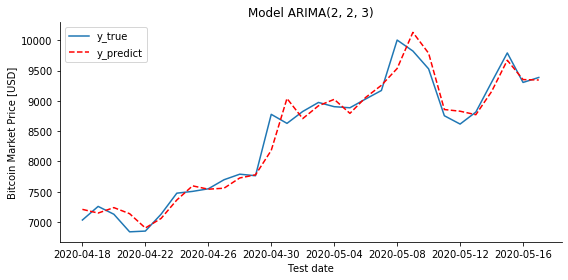

In [10]:
# prepare the dataset for plotting
predict_date = df_blockchain.iloc[-30::]["Date"]
df_predict = pd.DataFrame(zip(predict_date,
                              predictions, X_test.values),
                          columns=["date", "predict", "true"])
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="date", y="true", data=df_predict, 
             ax=ax, label="y_true", markers=True )
plot_ = sns.lineplot(x="date",
             y="predict",
             data=df_predict,
             color="red",ax=ax, label="y_predict")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()
freq = 4
ax.set_xticks(np.arange(0, len(new_ticks), freq))
labels = predict_date[::freq]
ax.set_xticklabels(labels)
ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title("Model ARIMA{}".format(best))
sns.despine()
plt.legend()
plt.tight_layout()

In [11]:
def MA(k,P):
    s=0
    i=1
    while i<=k and len(P)>=i:
        s+=P[-i]
        i+=1
    return(s/k)

In [12]:
#print(MA(2,[1,2,3,4,5]))

In [13]:
def decision(Prix,prediction,k):#Les 1 correspondent à un possible achat, les 0 à une possible vente
    L=[]
    for i in range(len(prediction)):
        if prediction[i]>MA(k,Prix[:(-len(prediction)+i-1):]):#-1 car on est décallés de 1 pour le fitting cf graphe
            L.append(1) # il est intéressant d'acheter
        else :
            L.append(0) # il n'est pas intéressant d'acheter
    print(L)

In [23]:
def valeur_portfolio(Prix,prediction,N_0,t,k,a,s,C_0,flw_ind,flw_crc): #valeur portfeuille au temps t, pour des décisions sur MA(k), C_0 capital à investir/ a pourcentage du capital investi lors d'achat, s: pourcentage du nombre de Bitcoin a revendre
    #a,s : pourcentage du capital qu'on est pret à lacher pour un achat, v pourcentage du nombre de bitcoin qu'on vend 
    #flw_ind indicateur dans [-1,1] relatif à la tendance du produit
    #flw_crc indicateur dans [0,1] relatif au caractère suiveur du joueur
    seuil=0.01 # si dans les prévisions le bitcoin gagne plus de 2% par rapport à MA(p) on achète, si il perd 2% on vend
    N=N_0 # nombre de bitcoin possédés
    V=N_0*Prix[-30] #valeur du portefeuille
    C=C_0 #capital financier possédé
    L=[Prix[-30]] #receuil des derniers prix d'achats pour les calculs des plus-values
    n=[N_0]
    c=[C_0]
    v=[N_0*Prix[-30]]
    
    #print([[N,int(V),int(C),int(V+C)]])#ce qu'on a initialement
    for i in range(t+1): #t in [0,29]
        if prediction[i]>(1.+seuil)*MA(k,Prix[:(-len(prediction)+i-1):]):#-1 car on est décallés de 1 pour le fitting cf graphe
            N+=a*(1+flw_ind*flw_crc*0.1)*(C/(Prix[len(np.array(df_blockchain["market-price"]))-len(predictions)+i]))
            #0.1 et 0.9 pouvant être modifiés selon les joueurs
            C=C*(1-a*(1+flw_ind*flw_crc*0.1))
            V=N*Prix[len(np.array(df_blockchain["market-price"]))-len(predictions)+i]
            L.append(Prix[len(np.array(df_blockchain["market-price"]))-len(predictions)+i])#on ajoute le prix du dernier achat
            n.append(N)
            c.append(int(C))
            v.append(int(V))
            
        elif prediction[i]<(1.-seuil)*MA(k,Prix[:(-len(prediction)+i-1):]):
            n_s=s*N*(1-flw_ind*flw_crc*0.1)
            #0.1 pouvant être modifié
            N-=n_s
            V=N*Prix[len(np.array(df_blockchain["market-price"]))-len(predictions)+i]
            p_valu=Prix[len(np.array(df_blockchain["market-price"]))-len(predictions)+i]-L[-1]
            #print('plus-value=',p_valu)
            n.append(N)
            v.append(int(V))
            
            if p_valu>0: #si plus-value
                C+=n_s*Prix[len(np.array(df_blockchain["market-price"]))-len(predictions)+i]-0.3*p_valu #on intègre l'imposition de 30% sur les plus-values
                c.append(int(C))
            
            else: #si aucune plus value
                C+=n_s*Prix[len(np.array(df_blockchain["market-price"]))-len(predictions)+i] 
                c.append(int(C))
        else:
            N=N
            V=N*Prix[len(np.array(df_blockchain["market-price"]))-len(predictions)+i]
            C=C
            n.append(N)
            c.append(int(C))
            v.append(int(V))
    return(n,v,c)      

In [24]:
portfolio=valeur_portfolio(np.array(df_blockchain["market-price"]),predictions,10,29,9,0.5,0.5,1000000,0,0)

No handles with labels found to put in legend.


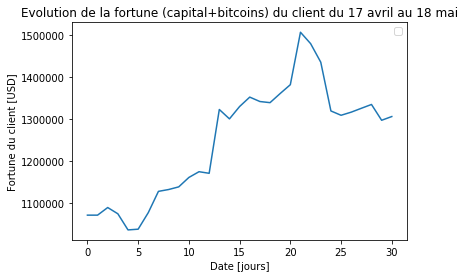

[1070348.9 1070348.  1088547.  1073609.  1035053.  1036799.  1076392.
 1127192.  1131574.  1137927.  1160422.  1174172.  1170358.  1322864.
 1300434.  1329954.  1352432.  1341902.  1339186.  1361043.  1382117.
 1507459.  1480230.  1435860.  1319372.  1309033.  1316466.  1325723.
 1334848.  1297083.  1305992. ]


In [25]:
T=[t for t in range(31)]
plt.plot(T,np.array(portfolio[1])+np.array(portfolio[2]))
plt.title('Evolution de la fortune (capital+bitcoins) du client du 17 avril au 18 mai')
plt.ylabel("Fortune du client [USD]")
plt.xlabel("Date [jours]")
plt.legend()
plt.show()
print(np.array(portfolio[1])+np.array(portfolio[2]))

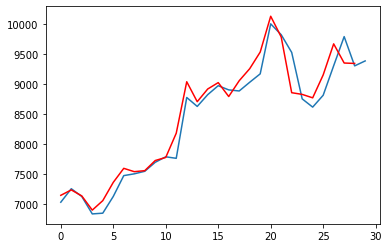

In [27]:
plt.figure()
plt.plot(np.array(df_blockchain["market-price"])[len(np.array(df_blockchain["market-price"]))-len(predictions)::])
plt.plot(predictions[1::],'r')
plt.show()

In [28]:
#modèle d'intéraction à plusieurs joueurs
def interaction(J,Prix,prediction_lst,N_0_lst,T,k,a_lst,s_lst,C_0_lst,flw_crc_lst):
    #J nombre de joueurs, puis liste des caractéristiques des joueurs définies en valeur_portfolio
    flw_ind=0
    t=0
    V=list(Prix[-30]*np.array(N_0_lst))
    while t<T:
        for i in range(J):
            n,v,c=valeur_portfolio(Prix[t:],prediction_lst[i][t:],N_0_lst[i][-1],1,10,a_lst[i],s_lst[i],C_0_lst[i][-1],flw_ind,flw_crc_lst[i])
            N_0_lst[i].append(n[-1])
            C_0_lst[i].append(c[-1])
            V[i]=list(V[i])
            V[i].append(v[-1])
        somme=0
        sommeprev=0
        for i in range(J):                              #actualisation de l'indicateur de tendance, basé sur la tendance des derniers jours
            somme=somme+N_0_lst[i][-1]
            s=0
            ct=0
            for u in range(3):
                ct=ct+1
                s=s+N_0_lst[i][max(-2-u,-len(N_0_lst[i]))]
            sommeprev=sommeprev+s/ct
        ind=somme/sommeprev
        flw_ind=2*ind-1
        t=t+1
    return(N_0_lst,C_0_lst,V)
            
    

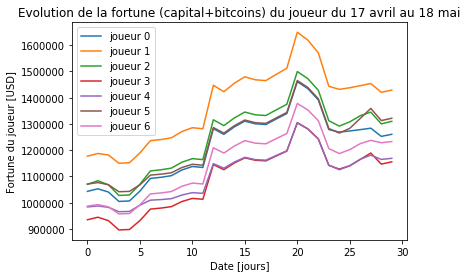

In [31]:
J=7
predictions_lst=[]
for i in range(J):                                                # ajout d'aléatoire dans les prévisions des autres joueurs, dans les valeurs et dans les indices temporelles
    pred=[]
    for elm in predictions:
        pred.append(elm+np.random.normal(0,50,1)[0]) 
    a=np.random.randint(0,3,1)[0]
    if not i==0:
        if a==0:
            predictions_lst.append([pred[0]+np.random.normal(0,50,1)[0]]+pred[:-1])
        if a==3:
            predictions_lst.append(pred[1:]+[pred[-1]+np.random.normal(0,50,1)[0]])
    predictions_lst.append(pred)
        
  
N_0_lst,C_0_lst,V=interaction(J,np.array(df_blockchain["market-price"]),predictions_lst,[[9],[11],[10],[5],[2],[3],[1]],29,9,[0.25,0.22,0.35,0.3,0.1,0.15,0.18],[0.35,0.32,0.24,0.15,0.2,0.1,0.23],[[980000],[1100000],[1000000],[900000],[970000],[1050000],[980000]],[0.23,0.3,0.2,0.4,0,0.15,0.12])


T=[i for i in range(len(N_0_lst[0]))]
for i in range(J):                                                                #affichage
    plt.plot(T,np.array(V[i])+np.array(C_0_lst[i]),label='joueur '+str(i))
    plt.legend()
    
plt.title('Evolution de la fortune (capital+bitcoins) du joueur du 17 avril au 18 mai')
plt.ylabel("Fortune du joueur [USD]")
plt.xlabel("Date [jours]")
plt.legend()
plt.show()